<a href="https://www.kaggle.com/code/avd1729/churn-classification?scriptVersionId=130317044" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Setting up the environment**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# **Preprocessing**

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
imputer = SimpleImputer()
scaler = StandardScaler()
encoder = OrdinalEncoder()

In [5]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median") ,StandardScaler()) 
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent") , OrdinalEncoder())

In [6]:
from sklearn.compose import make_column_selector , make_column_transformer

preprocessing = make_column_transformer(
(num_pipeline ,make_column_selector(dtype_include=np.number) ),
(cat_pipeline ,make_column_selector(dtype_include=np.object))
)

In [7]:
X = data.drop(['RowNumber','Exited'],axis=1)
y = data['Exited']

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [9]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.fit_transform(X_test)

In [10]:
X_train_prepared

array([[-1.24645641e+00,  3.56499708e-01, -6.55785897e-01, ...,
         1.88300000e+03,  0.00000000e+00,  1.00000000e+00],
       [ 1.05381124e+00, -2.03897768e-01,  2.94938465e-01, ...,
         1.37900000e+03,  1.00000000e+00,  1.00000000e+00],
       [ 3.66478604e-01, -9.61472134e-01, -1.41636539e+00, ...,
         9.59000000e+02,  2.00000000e+00,  1.00000000e+00],
       ...,
       [-1.62596480e+00,  8.65008530e-01, -8.53512797e-02, ...,
         1.48600000e+03,  0.00000000e+00,  0.00000000e+00],
       [ 1.62852321e+00,  1.59322819e-01,  3.90010902e-01, ...,
         1.57900000e+03,  0.00000000e+00,  1.00000000e+00],
       [ 2.17180714e-01,  4.70654750e-01,  1.15059039e+00, ...,
         2.22200000e+03,  1.00000000e+00,  1.00000000e+00]])

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_prepared , y_train)
y_pred = clf.predict(X_test_prepared)

In [12]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy of the model: {0}%'.format(acc))

Accuracy of the model: 81.75%


# **Feature Engineering**

In [13]:
import statsmodels.api as sm

logit = sm.Logit(y_train , X_train_prepared)
lm = logit.fit()

Optimization terminated successfully.
         Current function value: 0.458811
         Iterations 6


In [14]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.097      
Dependent Variable: Exited           AIC:              7364.9761  
Date:               2023-05-20 15:31 BIC:              7448.8225  
No. Observations:   8000             Log-Likelihood:   -3670.5    
Df Model:           11               LL-Null:          -4063.5    
Df Residuals:       7988             LLR p-value:      1.9633e-161
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        -0.0110     0.0290    -0.3800   0.7039   -0.0679    0.0458
x2        -0.0557     0.0290    -1.9220   0.0546   -0.1124    0.0011
x3         0.7193     0.0293    24.5750   0.0000    0.6619    0.7766
x4        -0.0441     0.0290    -1.5182   0.1290   -0.1009    0.0128
x5         0.3043     0.0309     9.8391   0.0000    0.2437    0.3650
x6        -0.0314     0.0294    -1.0696   0.2848   -0.0889    0.0261
x7        -0.0098     0.0290    -0.3382   0.7352   -0.0666    0.0470
x8        -0.4767     0.0302   -15.7760   0.0000   -0.5360   -0.4175
x9         0.0226     0.0292     0.7731   0.4395   -0.0346    0.0798
x10       -0.0006     0.0000   -21.4647   0.0000   -0.0006   -0.0005
x11       -0.1637     0.0333    -4.9135   0.0000   -0.2290   -0.0984
x12       -0.9783     0.0535   -18.2687   0.0000   -1.0832   -0.8733
==================================================================

"""

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
X = data.drop(['CustomerId', 'Surname',  'Geography',
        'Age', 'Tenure','NumOfProducts'],axis=1)
y = data['Exited']

# **Building the model**

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_prepared , y_train)
y_pred = clf.predict(X_test_prepared)

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf , X_train_prepared , y_train , cv=5 , scoring="accuracy")

array([1., 1., 1., 1., 1.])

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy of the model: {0}%'.format(acc))

Accuracy of the model: 100.0%


# **Error analysis**

In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<AxesSubplot: >

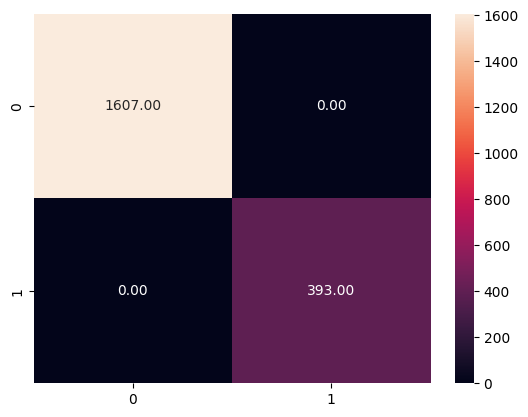

In [22]:
import seaborn as sn
cm = metrics.confusion_matrix(y_test , y_pred)
sn.heatmap(cm , annot=True , fmt='.2f')

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
pred_prob = clf.predict_proba(X_test_prepared)

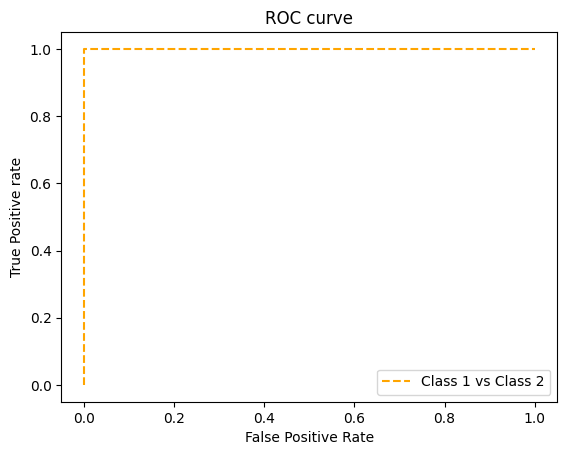

In [25]:
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Class 2')
#plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Class 1')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [26]:
'''
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_prepared , y_train)
y_pred = clf.predict(X_test_prepared)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy of the model: {0}%'.format(acc))
'''

"\nfrom sklearn.neighbors import KNeighborsClassifier\nclf = KNeighborsClassifier()\nclf.fit(X_train_prepared , y_train)\ny_pred = clf.predict(X_test_prepared)\nfrom sklearn.metrics import accuracy_score\nacc = accuracy_score(y_test,y_pred)*100\nprint('Accuracy of the model: {0}%'.format(acc))\n"